# Sesión 3 Programación básica, importación y exportación de datos
# 1.0 Programación básica con R

La programación implica escribir sistemas de instrucciones relativamente complejos. 

La mayoría de programas son muy repetitivos, pero el número de repeticiones depende de las entradas.

# 1.1 Cómo crear funciones en R

Las funciones conforman un bloque fundamental de construcción en R. Específicamente en R, una función es un objeto que toma otros objetos como *inputs* (entradas), llamados argumentos, y retorna un objeto *output* (salida). La mayoría de funciones están en la forma $f(\text{argumento_1},\text{argumento2},...)$, donde $f$ es el nombre de la función y $\text{argumento_1}, \text{argumento 2},$ y así sucesivamente, son los argumentos de la función.

Podemos escribir nuestras propias funciones usando el comando


```
function(){}
```
y asignarlo a una variable (lo que va en paréntesis es en donde guardamos las variables o inputs, y lo que va entre llaves, es la construcción del cuerpo de la función).

## Ejemplo 1

Recordemos que para dos vectores $\vec{x}=(x_1,...,x_n), \vec{y}=(y_1,...,y_n)\in\mathbb{R}^n$, la distancia euclidiana entre estos dos vectores es dada por
$$||\vec{x}-\vec{y}||=\sqrt{\sum_{i=1}^n(x_i-y_i)^2}$$

A continuación creamos una función que tiene como argumentos (o entradas) los dos vectores $\vec{x}$ y $\vec{y}$, y como salida obtenemos la distancia euclidiana.

In [135]:
dist = function(x,y){
  result = sqrt(sum((x-y)^2))
  return(result)
}
x = c(1,2)
y = c(1,1)
print(dist(x,y))

[1] 1


Las funciones pueden usar la función 
```
return()
```
para especificar el valor de salida de la función. Sin embargo, R simplemente retornará la última expresión evaluada como el resultado de una función, así podríamos ver el código que no hace uso de la función *return()* explícitamente.


## Ejemplo 2

Vamos a crear la función que haga la gráfica de la parábola $$y=ax^2+bx+c$$
cuyas entradas serán los coeficientes $a$, $b$ y $c$.

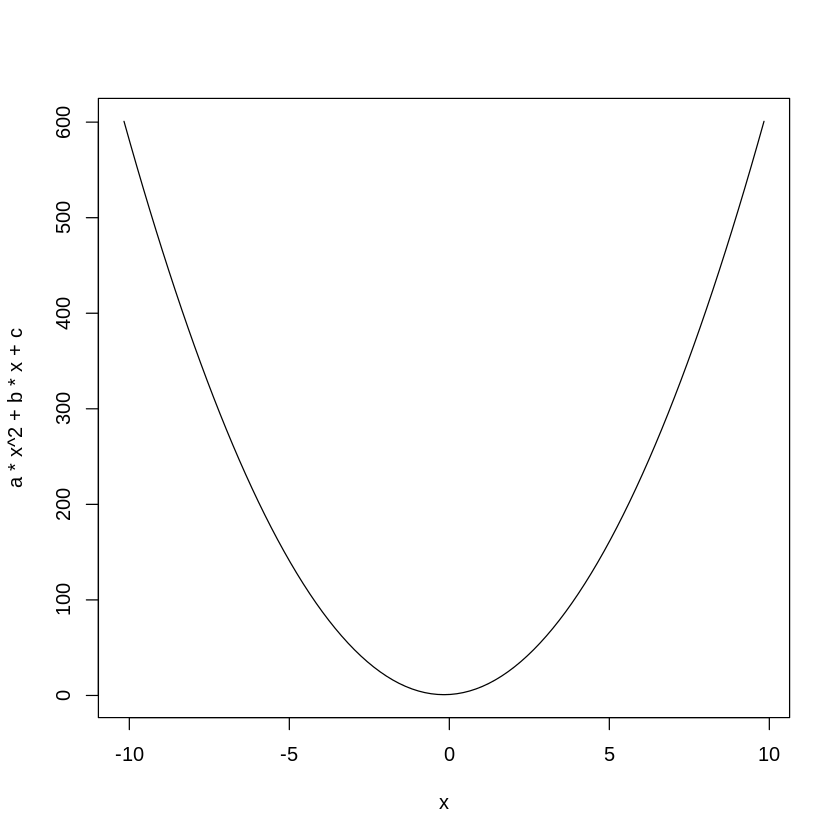

In [141]:
grafica_par = function(a,b,c){
  curve(a*x^2+b*x+c,from=-10-b/(2*a),to=-b/(2*a)+10)
}
grafica_par(6,2,1)

Funciones sin argumentos *f()*, en este caso podemos invocar la funcionalidad de f, simplemente escribiendo el comando


```
f()
```



In [142]:
cuatro = function(){
  return(4)
}

In [143]:
cuatro()

[1] 4

## Ejemplo 3

Vamos a ahora a crear una función que reemplace los NA's  de un vector por el promedio de los valores numéricos restantes en ese vector:

In [149]:
replace_nas = function(x)
{
  posiciones = which(is.na(x))       # la variable posiciones extrae las posiciones del vector en donde hay NAs
  x[posiciones] = mean(na.omit(x))   # rellenamos las posiciones donde habían NA's con la media de los valores numéricos en el vector
  return(x)
}
y = c(1,2,3,4,NA,5,8,NA)
print(replace_nas(y))

[1] 1.000000 2.000000 3.000000 4.000000 3.833333 5.000000 8.000000 3.833333


# 1.2 Control de flujo

## El ciclo *for()*
Hay simulaciones que implican la repetición de rutinas en programación.

La sentencia *for()* permite especificar que una cierta operación se repita un número fijo de veces.
### Sintáxis

```
for (name in vector)   {comandos}
```

Lo que significa que para una variable llamada *name* igual a cada uno de los elementos del *vector*, en una secuencia. Para cada valor, se ejecutarán los comandos que se enumeran entre las llaves. Las llaves sirven para agrupar los comandos tal que son tratadas por R como un comando particular. Si hay solamente un comando para ejecutar, las llaves no son necesarias. 



## Ejemplo 4
La sucesión de Fibonacci está definida recursivamente como
$$F_1=F_2=1$$
$$F_n = F_{n-1}+F_{n-2}\hspace{1cm}n=3,4,5,...$$

Escriba un código en el cual se obtengan los primeros 12 términos de la sucesión de Fibonacci

**Solución**

In [163]:
Fibonacci = numeric(12)               # Fibonacci es un vector de longitud 12 lleno de ceros
Fibonacci[1] = 1
Fibonacci[2] = 1                      # rellenamos las dos primeras posiciones con 1
for(i in 3:12){
Fibonacci[i]=Fibonacci[i-1]+Fibonacci[i-2]
}
Fibonacci

[1]   1   1   2   3   5   8  13  21  34  55  89 144

## Ejemplo 5
Para el vector 
```
c(2,-20,15,36,95,82,-69,4,8,98,-156,8)
```
Use un ciclo *for()* para calcular la media aritmética del vector y calcule el resultado usando el comando *mean*

Con un ciclo for imprima los números impares del 1 al 99

**Solución**

In [155]:
arreglo = c(2, -20, 15, 36, 95, 82, -69, 4, 8, 98, -156, 8)
promedio = 0
for (i in 1:length(arreglo))
{
  promedio = promedio + arreglo[i]
}
promedio = promedio/length(arreglo)
mean(arreglo) == promedio

[1] TRUE

In [156]:
for(i in seq(1,99,2)){
  print(i)
}

[1] 1
[1] 3
[1] 5
[1] 7
[1] 9
[1] 11
[1] 13
[1] 15
[1] 17
[1] 19
[1] 21
[1] 23
[1] 25
[1] 27
[1] 29
[1] 31
[1] 33
[1] 35
[1] 37
[1] 39
[1] 41
[1] 43
[1] 45
[1] 47
[1] 49
[1] 51
[1] 53
[1] 55
[1] 57
[1] 59
[1] 61
[1] 63
[1] 65
[1] 67
[1] 69
[1] 71
[1] 73
[1] 75
[1] 77
[1] 79
[1] 81
[1] 83
[1] 85
[1] 87
[1] 89
[1] 91
[1] 93
[1] 95
[1] 97
[1] 99


## La sentencia *if()*
Anteriormente habíamos aprendido acerca de vectores lógicos y operadores relacionales. La sentencia *if()* nos permite controlar que sentencias son ejecutadas y a veces, esto es más conveniente.

**Sintáxis**

```
if (condition) {commands when TRUE}
if (condition) {commands when TRUE} else {commands when FALSE}
if (condition) {commands} else if (condition){commands} else {commands}
```



## Ejemplo 6

Un ejemplo simple es el siguiente

In [158]:
x = 1816
if(x%%3==0){y=1}else{y=0}
y

[1] 0

## Ejemplo 7

La correlación entre dos vectores de números es frecuentemente calculada usando la función


```
cor()
```
Se supone que la correlación nos da una medida de asociación lineal. Podemos adicionar un diagrama de dispersión de la información como sigue:



[1] 0.179726

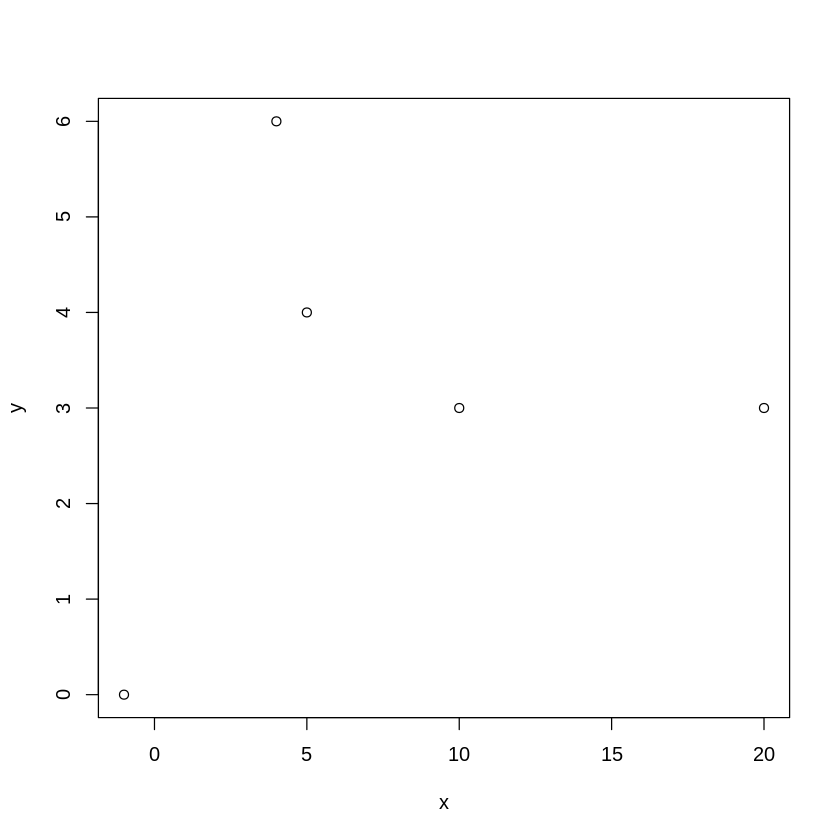

In [167]:
v1 = c(-1,5,10,4,20)
v2 = c(0,4,3,6,3)
corplot = function(x,y,plot_cor){
  if(plot_cor==TRUE){
    plot(x,y)
  }
  cor(x,y)
}
corplot(v1,v2,T)

## Ejercicio 1
Use la función
```
sample()
```
para generar dos muestras aleatorias de números enteros entre 1 y 100 sin repetición y páselos por la función *corplot()* arriba.



## Solución

[1] -0.07012354

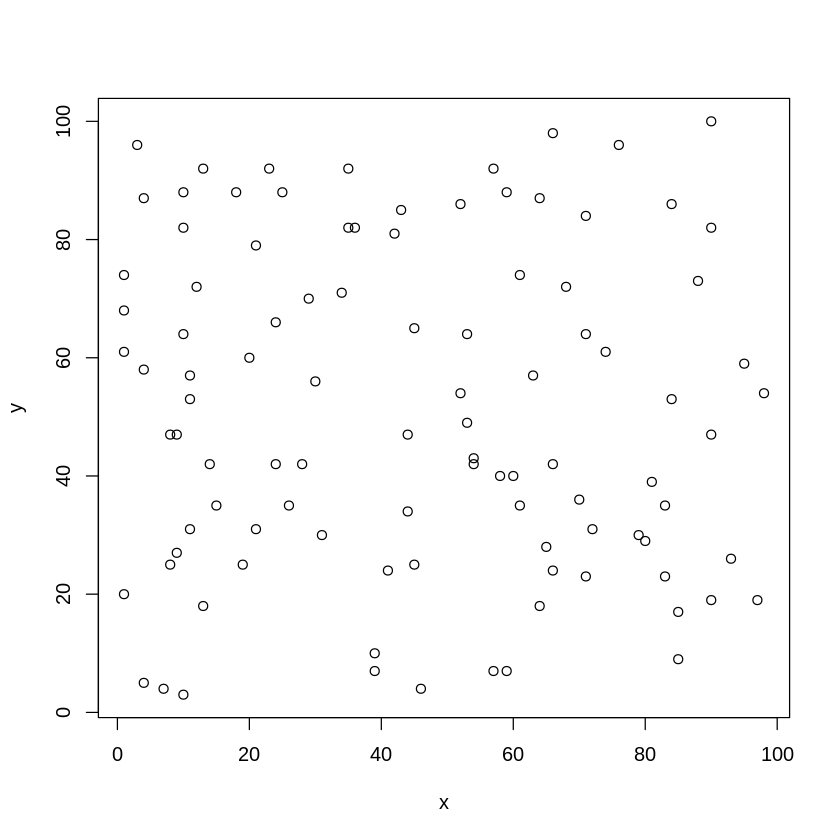

In [168]:
x = sample(1:100,replace=F)
y = sample(1:100,replace=F)
corplot(x,y,T)

## Ejemplo 8

Un banco ofrece un certificado de inversión garantizado (CIG) el cual paga un interés anual del 4% (compuesto anualmente) si el plazo es 3 años o menos, o 5% si el plazo es más de 3 años. Escriba una función que tome el monto de inversión inicial $P$, y el número de periodos de interés (es decir, los años) como los argumentos y que retorne el monto ganado de interés sobre el plazo del CIG. Eso es, que retorne $I$ donde 
$$I=P((1+i)^n-1)$$

In [170]:
CIG = function(P,n){
  if(n<=3){
    i = 0.04
    return(P*((1+i)^n-1))
  }
  else{
    i = 0.05
    return(P*((1+i)^n-1))
  }
}

P = 1000000
n1 = 5
n2 = 2

print(CIG(P,n1))
print(CIG(P,n2))


[1] 276281.6
[1] 81600


# Ciclos *while()*

A veces queremos repetir las sentencias, pero el patrón de repetición no es conocido de antemano. Necesitamos hacer algunos cálculos y continuar mientras se cumpla una condición. La sentencia 


```
while()
```
logra este objetivo.

## Sintáxis


```
while(condition){statements}
```
La *condition* es evaluada, y si se evalúa como *FALSE*, se termina el ciclo. Si evalúa *TRUE* las sentencias con ejecutadas, la *condition* es evaluada nuevamente, y el proceso es repetido.





## Ejemplo 9 

Suponga que queremos enlistar todos los números de Fibonacci menores que 300. No sabemos de antemano lo larga que esta lista será, así que no sabríamos como parar un ciclo *for* en el tiempo adecuado. Sin embargo, un ciclo *while()* es perfecto:

In [173]:
f1 = 1
f2 = 1
f = c(f1,f2)
while(f2<300){
f = c(f,f2)
oldf2 = f2
f2 = f1+f2
f1 = oldf2
}
f[-1]

[1]   1   1   2   3   5   8  13  21  34  55  89 144 233

# Ejercicios

1. Las tasas de interés de las hipotecas a veces pueden depender de si el plazo de las hipotécas es abierto o cerrado. Use la fórmula
$$R = \frac{Pi}{1-(1+i)^{-n}}$$
para crear una función que calcule el pago mensual de la hipoteca $R$ donde $i$ es una tasa de interés (compuesta mensualmente), $P$ es el principal original, y $n$ es la longitud del plazo (en mes). La función debe tomar $n$, $P$, y *open* como argumentos. Si *open==TRUE*, entonces tome $i=0.005$; de otra manera, tome $i=0.004$.

2. Sea $F_n$ el n-ésimo número de Fibonacci.

   a. Construya la sucesión de cocientes $F_n/F_{n-1}$, $n=2,...,30$. ¿Parece que la sucesión de cocientes converge? 

   b. Calcule en número *áureo* $(1+ \sqrt{5})/2$ y compare la convergencia en a.

3. Determine el número de números de Fibonacci menores que 1 000 000.
4. Construya una función que extraiga el valor numérico máximo de un vector de números $x$ sin usar la función de R, *max()*.

## Solución

In [ ]:
pago = function(P,n,open){
  if(open==T){
    i = 0.005
    return(P*i/(1-(1+i)^(-n)))
  }else{
    i=0.004
    return(P*i/(1-(1+i)^(-n)))
  }
}
P = 1000000
n = 10
pago_1 = pago(P,n,T)
pago_2 = pago(P,n,F)
print(pago_1)
print(pago_2)

[1] 102770.6
[1] 102213.2


In [ ]:
Fibon = numeric(30)
Fibon[1] = Fibon[2] = 1
cociente = numeric(29)
for(i in 3:30) Fibon[i] = Fibon[i-1] + Fibon[i-2]
for(j in 2:30) cociente[j] = Fibon[j]/Fibon[j-1]
print(cociente)
print((1+sqrt(5))/2)

 [1] 0.000000 1.000000 2.000000 1.500000 1.666667 1.600000 1.625000 1.615385
 [9] 1.619048 1.617647 1.618182 1.617978 1.618056 1.618026 1.618037 1.618033
[17] 1.618034 1.618034 1.618034 1.618034 1.618034 1.618034 1.618034 1.618034
[25] 1.618034 1.618034 1.618034 1.618034 1.618034 1.618034
[1] 1.618034


In [174]:
Fib1 = 1
Fib2 = 1
Fibonacci = c(Fib1,Fib2)
while(Fib2<1000000){
  Fibonacci = c(Fibonacci,Fib2)
  oldFib2 = Fib2
  Fib2 = Fib1 + Fib2
  Fib1 = oldFib2
}
print(length(Fibonacci)-1)

[1] 30


In [179]:
maxim = function(x){
  max_val = x[1]
  for(i in 2:length(x)){
     if(max_val<=x[i]){
       max_val = x[i]
     }
  }
  return(max_val)
}
maxim(c(1000,1,2,10000,3,4,5,15000))

[1] 15000

## Ciclos con *repeat()* y sentencia *break*.

El comando *repeat()* repite hasta que ejecutamos la sentencia *break*.

Sintáxis


```
repeat{statements}
```
la sentencia *break* causa que el ciclo termine inmediatamente. También puede ser usada en ciclos for y while. La afirmación *next* causa que el control regrese a la parte de arriba del código y puede ser usado en cualquier ciclo.

### Ejemplo 10

Crear el vector *letras* con la información: "c", "l", "i", "M","T" y "A" y usar un ciclo *repeat* junto con la sentencia *break* para imprimir la información en *letras*.

In [ ]:
letras = c( "c", "l", "i", "M","T" , "A" )
i = 1
repeat{
  print(letras[i])
  i = i+1
  if(i>length(letras)){
    break
  }
}

[1] "c"
[1] "l"
[1] "i"
[1] "M"
[1] "T"
[1] "A"


# 2.0 Importación y Exportación de datos en R

## 2.1 Archivos csv y la función read.csv

In [ ]:
datos = read.csv('/content/missing-data.csv',header = TRUE, sep = ",") # primer argumento=ruta de acceso al csv, segundo argumento=TRUE para que aparezca 
                                                                   # encabezado y tercer argumento="," para indicarle a R que ese es el separador.

In [ ]:
datos$Income

[1]  89800  47500  45000  44700  59500     NA  63300  52900  78200 145100
[11]  88600  65600     NA  94600  59400  47300  72100      0      0  83000
[21]  64100  42100      0  91500  51200  13800  47500

In [ ]:
head(datos,10) #visualizar los primeros 10 datos del data frame

,Income,Phone_type,Car_type
,<int>,<chr>,<chr>
1,89800,Android,Luxury
2,47500,Android,Non-Luxury
3,45000,iPhone,Luxury
4,44700,,Luxury
5,59500,iPhone,Luxury
6,NA,Android,Non-Luxury
7,63300,iPhone,Non-Luxury
8,52900,Android,Luxury
9,78200,Android,Luxury


In [ ]:
tail(datos,10) #últimos 10 datos

In [ ]:
datos[105:115,] # visualizar los datos del 105 al 115

In [ ]:
names(datos) # contiene el nombre de todas las columnas (variables)

## 2.2 Importación de archivos excel

Aquí presentamos dos opciones.

La primera es la importación de hojas de cálculo usando el paquete *readxl*. Para eso instalamos con


```
install.packages("readxl")
```
y cargamos la librería con



```
library(readxl)
```





In [ ]:
install.packages('readxl')
library(readxl)

In [ ]:
datos_excel = read_excel("/content/Libro1.xlsx",sheet=2)

In [ ]:
head(datos_excel)

Por otra parte, también podemos importar datos de excel instalando el paquete *xlsx*


```
install.packages("xlsx")
```
y cargar el paquete con el comando


```
library(xlsx)
```





In [ ]:
install.packages("xlsx")
library(xlsx)

In [ ]:
datos_excel_2 = read.xlsx("/content/Libro1.xlsx",sheetIndex = 2,header=TRUE)
head(datos_excel_2)

## Importación de datos csv desde una url


In [ ]:
install.packages("RCurl")
library(RCurl)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
archivo = getURL("https://sakai.unc.edu/access/content/group/3d1eb92e-7848-4f55-90c3-7c72a54e7e43/public/data/bycatch.csv")
class(archivo)

[1] "character"

In [ ]:
datos_2 = read.csv(textConnection(archivo), header=T)

In [ ]:
head(datos_2)

,Season,Area,Gear.Type,Time,Tows,Bycatch
,<chr>,<chr>,<chr>,<chr>,<int>,<int>
1,1989-90,North,Bottom,Day,48,0
2,1989-90,North,Bottom,Night,6,0
3,1989-90,North,Mid-Water,Night,1,0
4,1989-90,South,Bottom,Day,139,0
5,1989-90,South,Mid-Water,Day,6,0
6,1989-90,South,Bottom,Night,6,0


# 2.3 Exportación de datos en R


In [ ]:
df = data.frame("A"=c(1,2,3,4),"B"=c(5,6,7,8),"C"=c(9,10,11,12))
write.csv(df,"tabla.csv")

In [ ]:
write.xlsx(df,"tabla.xlsx")